<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/RandomForest_Tunning_ConMatrix_ROC_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checking Ram

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#numpy and pandas

In [87]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Thesis_Data/EEG_HMC_Wake_NREM_REM_3000.csv')



dataset.head()
target="Sleep Stage"


In [ ]:
dataset.shape

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [68]:
dataset[target].value_counts() 

NREM    1798
Wake     629
REM      573
Name: Sleep Stage, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  ['NREM' 'REM' 'Wake']
After encoding: {0, 1, 2}


In [79]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X =  scaler.transform(X)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
y_train.value_counts()

0    1447
2     494
1     459
Name: Sleep Stage, dtype: int64

In [76]:

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
y_train.value_counts()

NREM    1447
REM     1447
Wake    1447
Name: Sleep Stage, dtype: int64

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[340   4   7]
 [  9 104   1]
 [ 14   1 120]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       351
           1       0.95      0.91      0.93       114
           2       0.94      0.89      0.91       135

    accuracy                           0.94       600
   macro avg       0.94      0.92      0.93       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.94


 17%|█▋        | 5/30 [00:00<00:00, 35.00it/s]

1/30 round completed......................... Accurecy: 0.8416666666666667
2/30 round completed......................... Accurecy: 0.83
3/30 round completed......................... Accurecy: 0.8983333333333333
4/30 round completed......................... Accurecy: 0.9066666666666666
5/30 round completed......................... Accurecy: 0.9083333333333333
6/30 round completed......................... Accurecy: 0.9116666666666666


 30%|███       | 9/30 [00:00<00:01, 20.53it/s]

7/30 round completed......................... Accurecy: 0.9283333333333333
8/30 round completed......................... Accurecy: 0.92
9/30 round completed......................... Accurecy: 0.9233333333333333


 40%|████      | 12/30 [00:00<00:01, 15.37it/s]

10/30 round completed......................... Accurecy: 0.9283333333333333
11/30 round completed......................... Accurecy: 0.93
12/30 round completed......................... Accurecy: 0.93


 47%|████▋     | 14/30 [00:00<00:01, 12.77it/s]

13/30 round completed......................... Accurecy: 0.9316666666666666
14/30 round completed......................... Accurecy: 0.93


 53%|█████▎    | 16/30 [00:01<00:01, 10.79it/s]

15/30 round completed......................... Accurecy: 0.9316666666666666
16/30 round completed......................... Accurecy: 0.9333333333333333


 60%|██████    | 18/30 [00:01<00:01,  9.30it/s]

17/30 round completed......................... Accurecy: 0.935
18/30 round completed......................... Accurecy: 0.935


 67%|██████▋   | 20/30 [00:01<00:01,  8.09it/s]

19/30 round completed......................... Accurecy: 0.935
20/30 round completed......................... Accurecy: 0.9366666666666666


 73%|███████▎  | 22/30 [00:02<00:01,  7.00it/s]

21/30 round completed......................... Accurecy: 0.9366666666666666
22/30 round completed......................... Accurecy: 0.9333333333333333


 80%|████████  | 24/30 [00:02<00:00,  6.08it/s]

23/30 round completed......................... Accurecy: 0.9383333333333334
24/30 round completed......................... Accurecy: 0.94


 83%|████████▎ | 25/30 [00:02<00:00,  5.67it/s]

25/30 round completed......................... Accurecy: 0.9416666666666667


 87%|████████▋ | 26/30 [00:02<00:00,  5.32it/s]

26/30 round completed......................... Accurecy: 0.9416666666666667


 90%|█████████ | 27/30 [00:03<00:00,  5.03it/s]

27/30 round completed......................... Accurecy: 0.94


 93%|█████████▎| 28/30 [00:03<00:00,  4.80it/s]

28/30 round completed......................... Accurecy: 0.9366666666666666


 97%|█████████▋| 29/30 [00:03<00:00,  4.59it/s]

29/30 round completed......................... Accurecy: 0.9433333333333334


100%|██████████| 30/30 [00:03<00:00,  7.59it/s]

30/30 round completed......................... Accurecy: 0.9383333333333334
The best n_estimators:
29


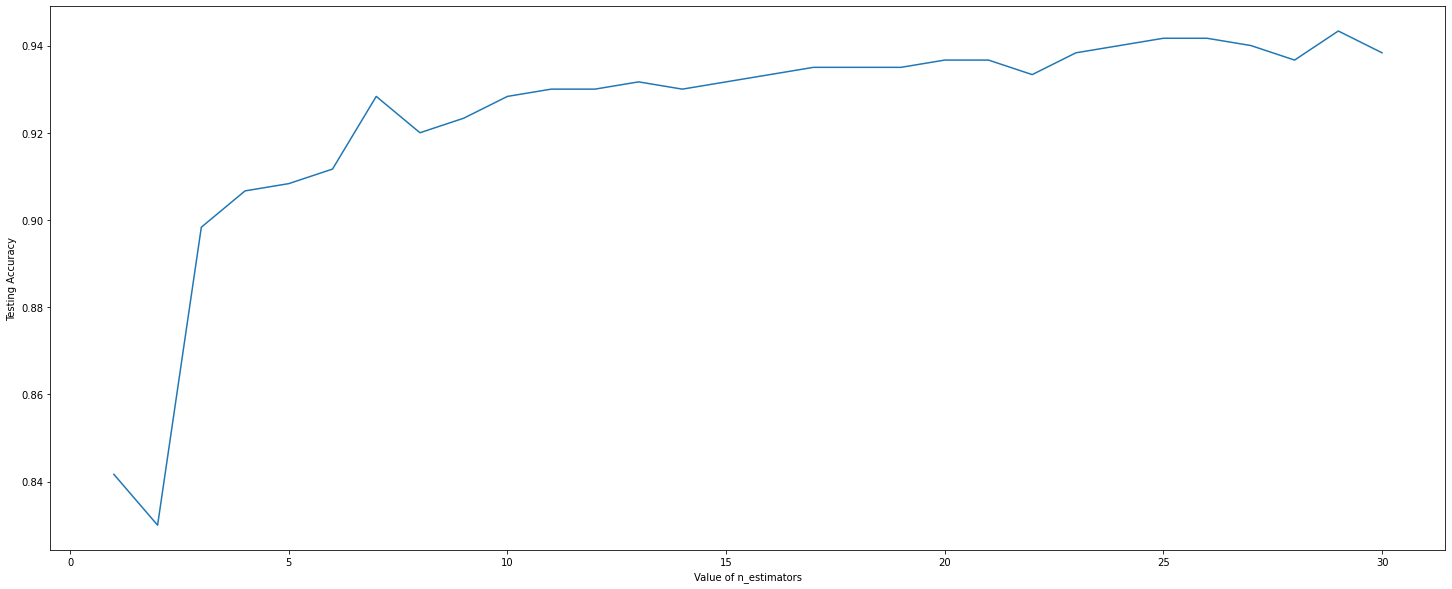

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  3%|▎         | 1/30 [00:00<00:07,  4.14it/s]

1/30 round completed......................... Accurecy: 0.7316666666666667


  7%|▋         | 2/30 [00:00<00:08,  3.49it/s]

2/30 round completed......................... Accurecy: 0.79


 10%|█         | 3/30 [00:00<00:08,  3.04it/s]

3/30 round completed......................... Accurecy: 0.8516666666666667


 13%|█▎        | 4/30 [00:01<00:09,  2.65it/s]

4/30 round completed......................... Accurecy: 0.8966666666666666


 17%|█▋        | 5/30 [00:01<00:10,  2.31it/s]

5/30 round completed......................... Accurecy: 0.9233333333333333


 20%|██        | 6/30 [00:02<00:11,  2.04it/s]

6/30 round completed......................... Accurecy: 0.9316666666666666


 23%|██▎       | 7/30 [00:03<00:12,  1.84it/s]

7/30 round completed......................... Accurecy: 0.9333333333333333


 27%|██▋       | 8/30 [00:03<00:13,  1.68it/s]

8/30 round completed......................... Accurecy: 0.9333333333333333


 30%|███       | 9/30 [00:04<00:13,  1.56it/s]

9/30 round completed......................... Accurecy: 0.9383333333333334


 33%|███▎      | 10/30 [00:05<00:13,  1.46it/s]

10/30 round completed......................... Accurecy: 0.9383333333333334


 37%|███▋      | 11/30 [00:06<00:13,  1.40it/s]

11/30 round completed......................... Accurecy: 0.945


 40%|████      | 12/30 [00:06<00:13,  1.35it/s]

12/30 round completed......................... Accurecy: 0.9466666666666667


 43%|████▎     | 13/30 [00:07<00:12,  1.31it/s]

13/30 round completed......................... Accurecy: 0.9483333333333334


 47%|████▋     | 14/30 [00:08<00:12,  1.29it/s]

14/30 round completed......................... Accurecy: 0.94


 50%|█████     | 15/30 [00:09<00:11,  1.26it/s]

15/30 round completed......................... Accurecy: 0.94


 53%|█████▎    | 16/30 [00:10<00:11,  1.23it/s]

16/30 round completed......................... Accurecy: 0.9416666666666667


 57%|█████▋    | 17/30 [00:11<00:10,  1.21it/s]

17/30 round completed......................... Accurecy: 0.9416666666666667


 60%|██████    | 18/30 [00:11<00:09,  1.21it/s]

18/30 round completed......................... Accurecy: 0.9466666666666667


 63%|██████▎   | 19/30 [00:12<00:09,  1.21it/s]

19/30 round completed......................... Accurecy: 0.9466666666666667


 67%|██████▋   | 20/30 [00:13<00:08,  1.20it/s]

20/30 round completed......................... Accurecy: 0.9416666666666667


 70%|███████   | 21/30 [00:14<00:07,  1.19it/s]

21/30 round completed......................... Accurecy: 0.9433333333333334


 73%|███████▎  | 22/30 [00:15<00:06,  1.18it/s]

22/30 round completed......................... Accurecy: 0.945


 77%|███████▋  | 23/30 [00:16<00:05,  1.19it/s]

23/30 round completed......................... Accurecy: 0.945


 80%|████████  | 24/30 [00:17<00:05,  1.20it/s]

24/30 round completed......................... Accurecy: 0.945


 83%|████████▎ | 25/30 [00:17<00:04,  1.20it/s]

25/30 round completed......................... Accurecy: 0.945


 87%|████████▋ | 26/30 [00:18<00:03,  1.21it/s]

26/30 round completed......................... Accurecy: 0.945


 90%|█████████ | 27/30 [00:19<00:02,  1.21it/s]

27/30 round completed......................... Accurecy: 0.945


 93%|█████████▎| 28/30 [00:20<00:01,  1.21it/s]

28/30 round completed......................... Accurecy: 0.945


 97%|█████████▋| 29/30 [00:21<00:00,  1.21it/s]

29/30 round completed......................... Accurecy: 0.945


100%|██████████| 30/30 [00:22<00:00,  1.36it/s]

30/30 round completed......................... Accurecy: 0.945
The best Depth:
13


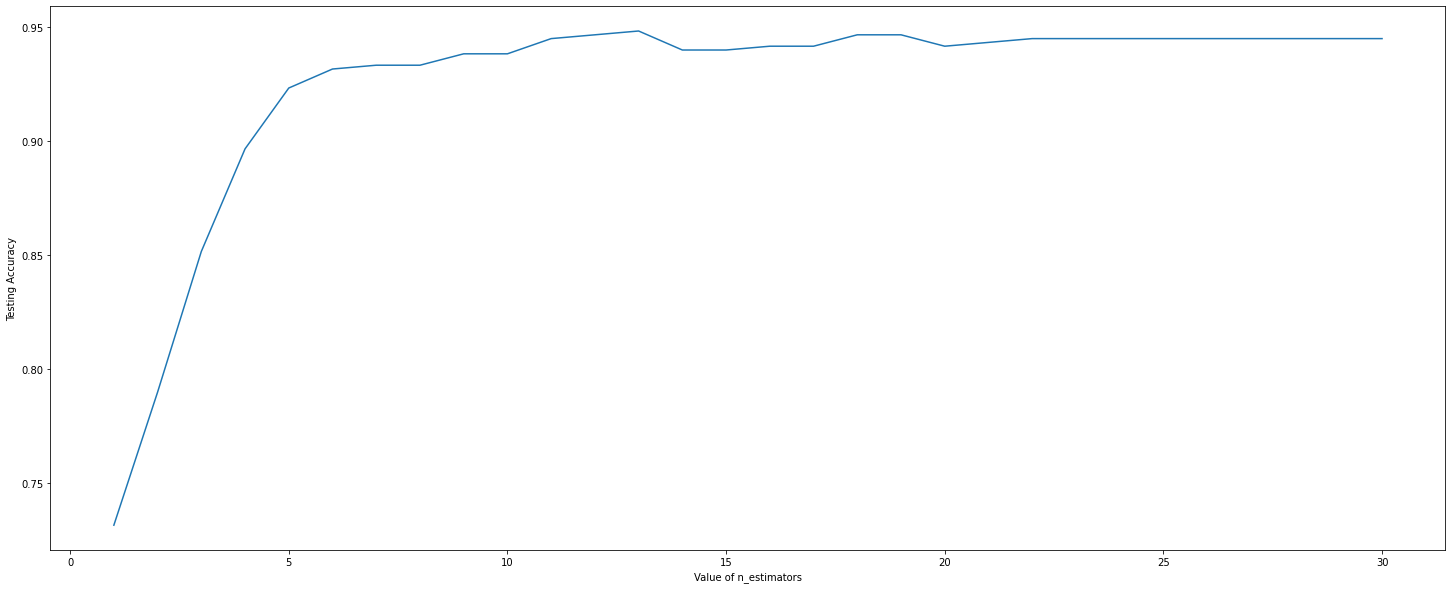

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[340   4   7]
 [  7 106   1]
 [ 13   1 121]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       351
           1       0.95      0.93      0.94       114
           2       0.94      0.90      0.92       135

    accuracy                           0.94       600
   macro avg       0.95      0.93      0.94       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.945
